In [1]:
# confidence interval

In [2]:
import pandas as pd
import seaborn as sns
import scipy.stats as stats
import numpy as np
import random
import matplotlib.pyplot as plt

%matplotlib inline

In [3]:
sns.set(rc={'figure.figsize':(13, 7.5)})

In [4]:
np.random.seed(42)

normal_distribution_male_mass_pound = np.random.normal(loc=181, scale=24, size=6000)

In [6]:
normal_distribution_female_mass_pound = np.random.normal(loc=132, scale=22, size=6500)

In [7]:
all_mass_value = np.concatenate((normal_distribution_female_mass_pound, normal_distribution_male_mass_pound), axis=0)

In [10]:
df_ppl_mass = pd.DataFrame(data={'mass_pounds':all_mass_value})

In [12]:
df_ppl_mass.head()

,mass_pounds
0,107.490210
1,118.119522
2,111.274676
3,119.944092
4,127.288693


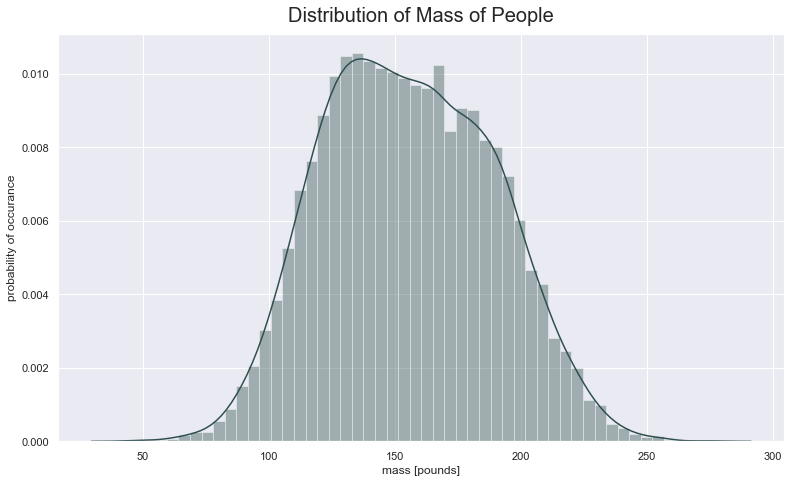

In [15]:
sns.distplot(df_ppl_mass['mass_pounds'], color='darkslategrey')
plt.xlabel('mass [pounds]')
plt.ylabel('probability of occurance')
plt.title('Distribution of Mass of People', y=1.015, fontsize=20)

plt.show()

In [46]:
# Calculate Population Mean
pop_mean_mass = df_ppl_mass['mass_pounds'].mean()
pop_mean_mass

155.4232805942342

In [53]:
# Calculate Population Standart Deviation
pop_std_dev_mass = df_ppl_mass['mass_pounds'].std()
pop_std_dev_mass

33.58519088395852

In [54]:
# Sampel 25 Orang, 300x sampel

sample_means = []
n = 25

for sample in range(0, 300):
    # random sampling
    sample_values = np.random.choice(a=df_ppl_mass['mass_pounds'], size=n)
    sample_mean = np.mean(sample_values)
    sample_means.append(sample_mean)

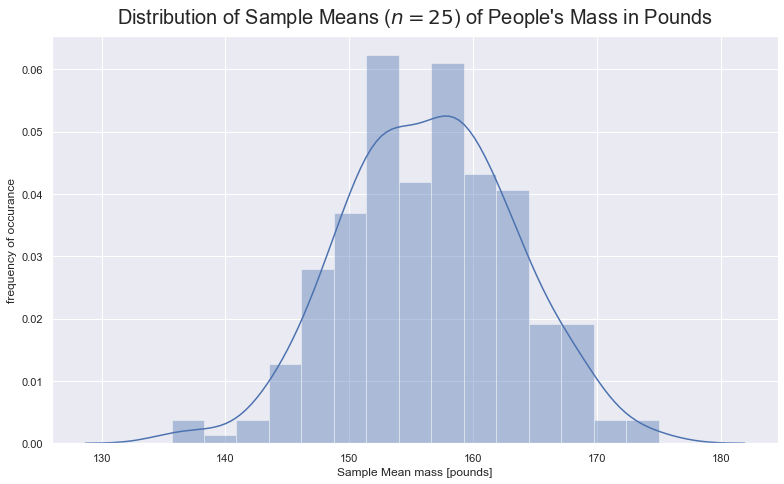

In [55]:
sns.distplot(sample_means)
plt.title('Distribution of Sample Means ($n=25$) of People\'s Mass in Pounds', y=1.015, fontsize=20)
plt.xlabel('Sample Mean mass [pounds]')
plt.ylabel('frequency of occurance')

plt.show()

In [56]:
# Calculate Sample Means

mean_of_sample_means = np.mean(sample_means)
mean_of_sample_means

156.45795564913828

In [57]:
# Calculate Std Dev of Sample Means

std_dev_of_sample_means = np.std(sample_means)
std_dev_of_sample_means

6.848148703857654

In [58]:
# Calculate Standart Error

standard_error = pop_std_dev_mass/np.sqrt(n)
standard_error

6.717038176791704

In [59]:
gym_sample_mean = 163

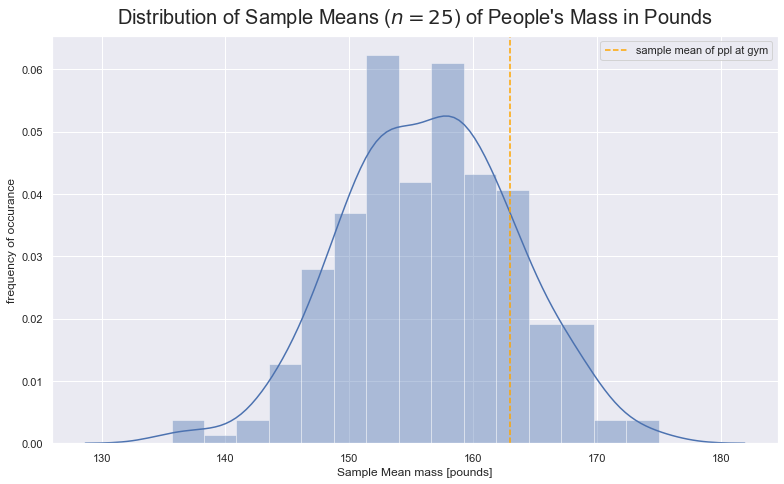

In [60]:
# Visualize gym sample mean to sampling distribution

sns.distplot(sample_means)
plt.axvline(x=gym_sample_mean, linestyle='--', label="sample mean of ppl at gym", c='orange')
plt.title('Distribution of Sample Means ($n=25$) of People\'s Mass in Pounds', y=1.015, fontsize=20)
plt.xlabel('Sample Mean mass [pounds]')
plt.ylabel('frequency of occurance')
plt.legend()
plt.show()

In [61]:
lower_CI = mean_of_sample_means - 1.96*standard_error

In [62]:
upper_CI = mean_of_sample_means + 1.96*standard_error

In [64]:
print(lower_CI)
print(upper_CI)

print(pop_mean_mass)

143.29256082262654
169.62335047565003
33.58519088395852


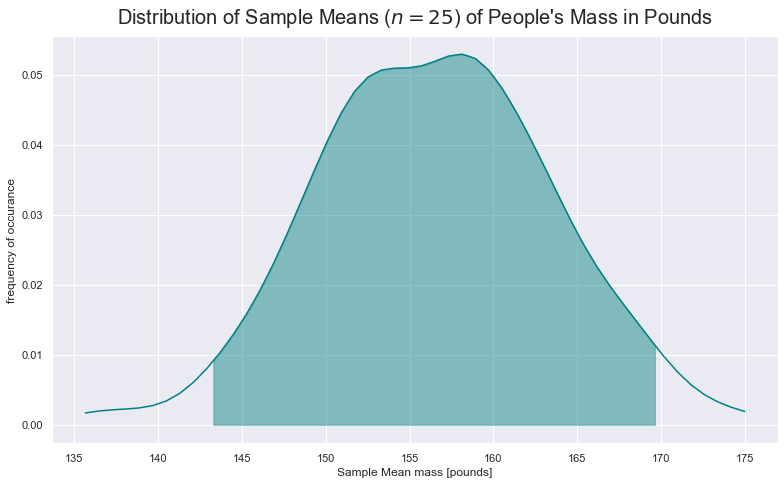

In [73]:
kde = stats.gaussian_kde(sample_means)
pos = np.linspace(np.min(sample_means), np.max(sample_means))
plt.plot(pos, kde(pos), color='teal')
shade = np.linspace(lower_CI, upper_CI)
plt.fill_between(shade, kde(shade), alpha=0.45, color='teal')

plt.title('Distribution of Sample Means ($n=25$) of People\'s Mass in Pounds', y=1.015, fontsize=20)
plt.xlabel('Sample Mean mass [pounds]')
plt.ylabel('frequency of occurance')

plt.show()

In [68]:
# Probability Distribution

In [69]:
# Uniform

In [70]:
from scipy.stats import uniform

In [71]:
n = 10000
start = 10
width = 20
data_uniform = uniform.rvs(size=n, loc=start, scale=width)

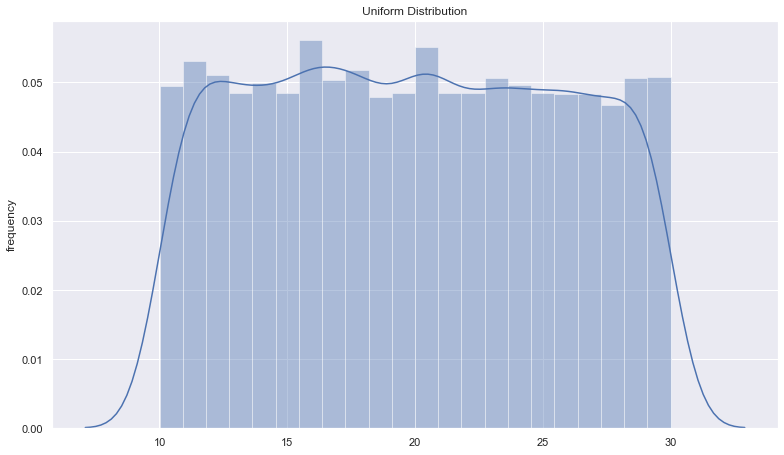

In [72]:
sns.distplot(data_uniform)
plt.title('Uniform Distribution')
plt.ylabel('frequency')
plt.show()

In [75]:
# Bernoulli

from scipy.stats import bernoulli
data_bern = bernoulli.rvs(size=10000, p=0.6)

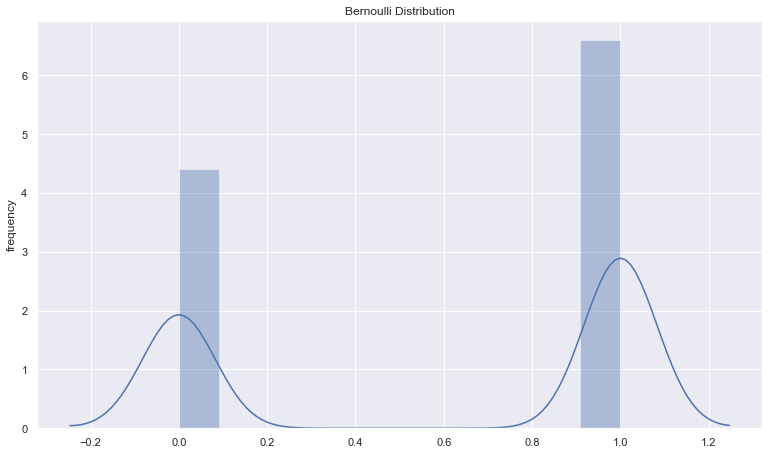

In [76]:
sns.distplot(data_bern)
plt.title('Bernoulli Distribution')
plt.ylabel('frequency')
plt.show()

In [77]:
# Binomial

from scipy.stats import binom
data_binom = binom.rvs(n=10, p=0.8, size=10000)

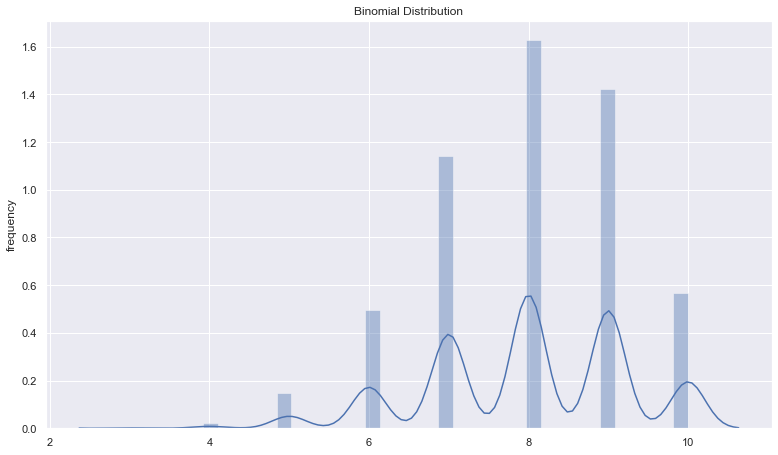

In [78]:
sns.distplot(data_binom)
plt.title('Binomial Distribution')
plt.ylabel('frequency')
plt.show()

In [79]:
# Poisson

from scipy.stats import poisson
data_poisson = poisson.rvs(mu=3, size=10000)

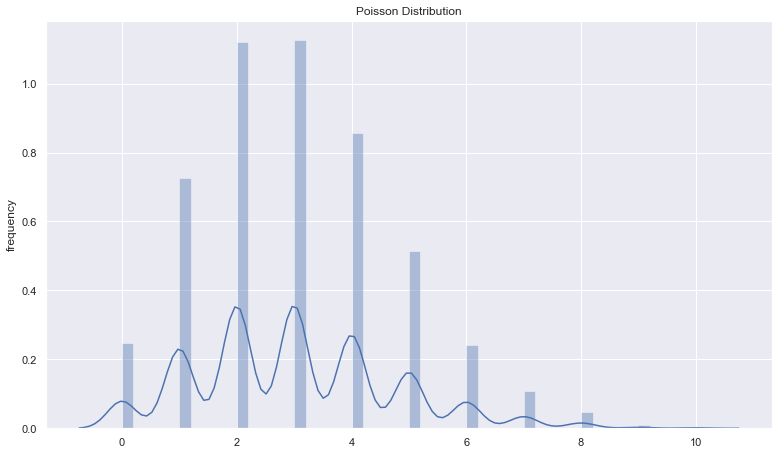

In [80]:
sns.distplot(data_poisson)
plt.title('Poisson Distribution')
plt.ylabel('frequency')
plt.show()

In [81]:
# Normal

from scipy.stats import norm
data_normal = norm.rvs(size=10000, loc=0, scale=1)

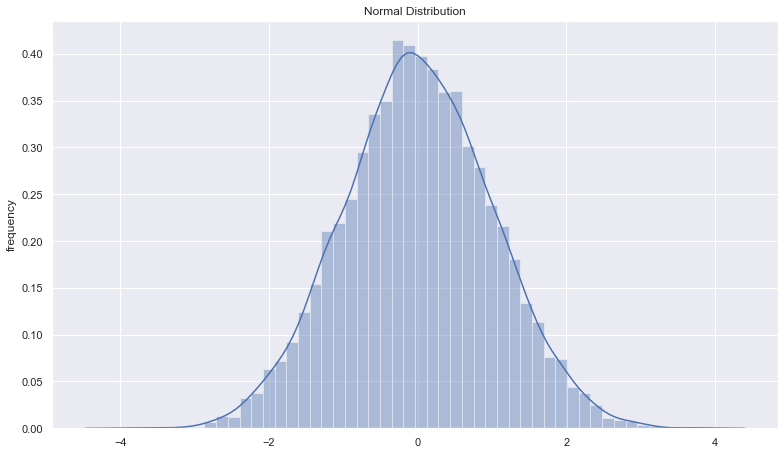

In [84]:
sns.distplot(data_normal)
plt.title('Normal Distribution')
plt.ylabel('frequency')
plt.show()

In [83]:
# Exponential

from scipy.stats import expon
data_expon = expon.rvs(scale=1, loc=0, size=1000)

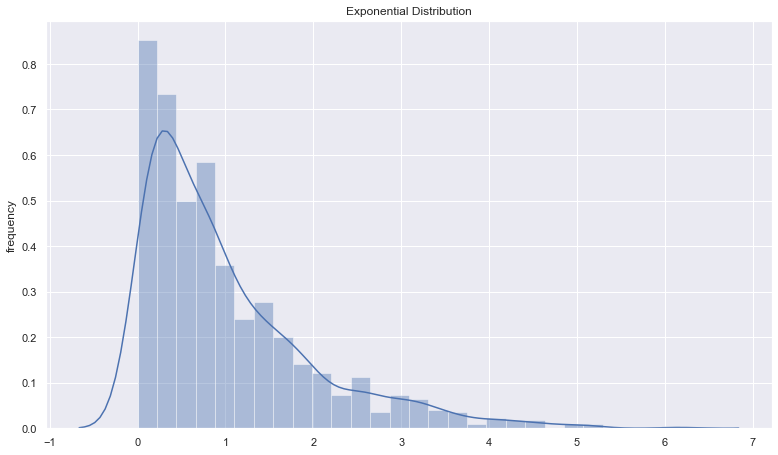

In [85]:
sns.distplot(data_expon)
plt.title('Exponential Distribution')
plt.ylabel('frequency')
plt.show()

In [86]:
# Hipotesis Testing

In [88]:
females = da[
    da['RIAGENDR'] == 2
]

male = da[
    da['RIAGENDR'] == 1
]

In [87]:
url = "https://raw.githubusercontent.com/kshedden/statswpy/master/NHANES/merged/nhanes_2015_2016.csv"
da = pd.read_csv(url)
da.head()

,SEQN,ALQ101,ALQ110,ALQ130,SMQ020,RIAGENDR,RIDAGEYR,RIDRETH1,DMDCITZN,DMDEDUC2,...,BPXSY2,BPXDI2,BMXWT,BMXHT,BMXBMI,BMXLEG,BMXARML,BMXARMC,BMXWAIST,HIQ210
0,83732,1.0,NaN,1.0,1,1,62,3,1.0,5.0,...,124.0,64.0,94.8,184.5,27.8,43.3,43.6,35.9,101.1,2.0
1,83733,1.0,NaN,6.0,1,1,53,3,2.0,3.0,...,140.0,88.0,90.4,171.4,30.8,38.0,40.0,33.2,107.9,NaN
2,83734,1.0,NaN,NaN,1,1,78,3,1.0,3.0,...,132.0,44.0,83.4,170.1,28.8,35.6,37.0,31.0,116.5,2.0
3,83735,2.0,1.0,1.0,2,2,56,3,1.0,5.0,...,134.0,68.0,109.8,160.9,42.4,38.5,37.7,38.3,110.1,2.0
4,83736,2.0,1.0,1.0,2,2,42,4,1.0,4.0,...,114.0,54.0,55.2,164.9,20.3,37.4,36.0,27.2,80.4,2.0


In [92]:
import statsmodels.api as sm

In [93]:
n1 = len(females)
mu1 = females["BMXBMI"].mean()
sd1 = females["BMXBMI"].std()

(n1, mu1, sd1)

(2976, 29.939945652173996, 7.75331880954568)

In [94]:
n2 = len(male)
mu2 = male["BMXBMI"].mean()
sd2 = male["BMXBMI"].std()

(n2, mu2, sd2)

(2759, 28.778072111846985, 6.252567616801485)

In [95]:
sm.stats.ztest(females["BMXBMI"].dropna(), male["BMXBMI"].dropna(),alternative='two-sided')

(6.1755933531383205, 6.591544431126401e-10)

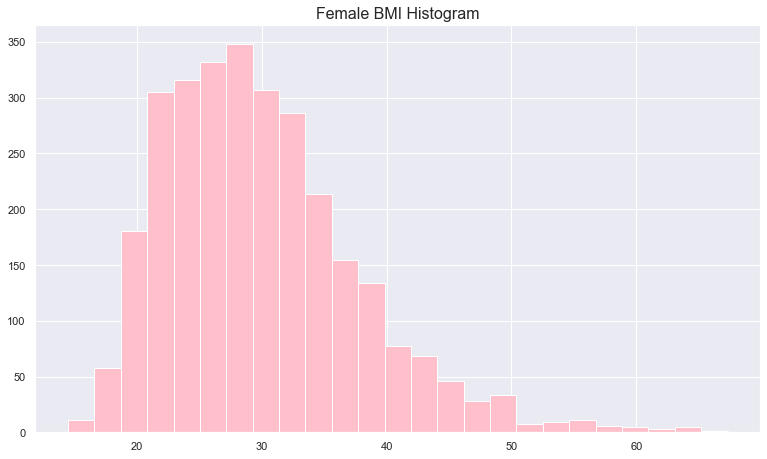

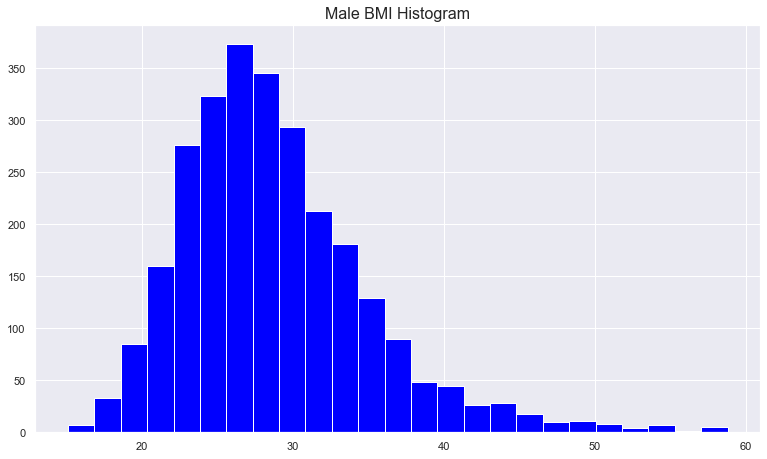

In [99]:
plt.title('Female BMI Histogram', fontsize=16)
plt.hist(females["BMXBMI"].dropna(), color='pink', bins=25)
plt.show()

plt.title('Male BMI Histogram', fontsize=16)
plt.hist(male["BMXBMI"].dropna(), color='blue', bins=25)
plt.show()